# TME sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle as pkl

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [2]:
# chargement des donnÃ©es
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

FileNotFoundError: [Errno 2] No such file or directory: 'donnees_blablacar.pkl'

## DiscrÃ©tisation et histogramme

Nous nous intÃ©ressons Ã  la variable `distance` (derniÃ¨re colonne). Nous allons procÃ©der de la maniÃ¨re suivante:
1. Analyse rapide de la variable alÃ©atoire: calcul de la moyenne et de l'Ã©cart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrÃ©tisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catÃ©gorie (= construction d'un histogramme)
 - Construire l'histogramme Ã  la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour dÃ©terminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - VÃ©rifier vos rÃ©sultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthÃ¨ses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associÃ©

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [17]:
# Analyse rapide : moyenne, Ã©cart-type, calcul des quantiles pour faire la synthÃ¨se de cette variable alÃ©atoire

d = data[:,-1] # extraction de la variable distance

# A vous de jouer pour calculer tous les descripteurs = recherche dans la doc numpy !

print("moyenne :", d.mean())

print("ecart-type :",d.std())

quantiles=[]
for i in range(0,100,10):
    quantiles.append(np.percentile(d,i))
print("quatiles :", quantiles)

moyenne : 254.74066583696327
ecart-type : 210.07021031617558
quatiles : [6.0, 64.0, 88.0, 111.0, 142.0, 182.0, 230.0, 316.0, 408.60000000000036, 552.0]


In [50]:
# DiscrÃ©tisation des distances & histogramme avec np.histogram
h = np.histogram(d)

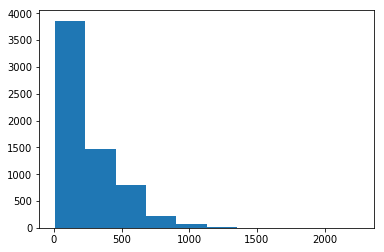

In [61]:
plt.hist(d)
plt.show()

2254.0 6.0
[6.0, 230.8, 455.6, 680.4000000000001, 905.2, 1130.0, 1354.8000000000002, 1579.6000000000001, 1804.4, 2029.2, 2254.0] [3859, 1465, 805, 213, 65, 13, 2, 3, 0, 0]


<BarContainer object of 10 artists>

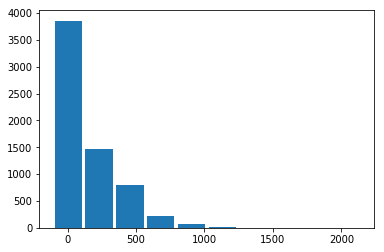

In [93]:
# DiscrÃ©tisation des distances & histogramme a la main
n = 30 # nb intervalle
inter = (d.max() - d.min())/10
print(d.max(), d.min())
m = d.min()
bornes = [m + i*inter for i in range(11)]
# calcul des effectifs avec np.where
effectifs = [len(np.where((d>bornes[i]) & (d<bornes[i+1]))[0]) for i in range(len(bornes)-1)]
print(bornes,effectifs)
# affichage avec plt.bar = histogramme Ã  la main
plt.bar(bornes[:-1], effectifs, 200)

## histogramme (bis)
Tracer l'histogramme des prix au km

<BarContainer object of 10 artists>

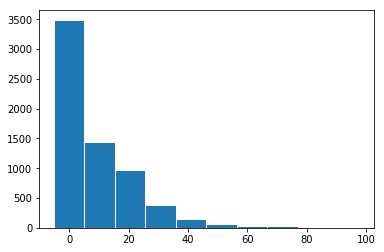

In [119]:
# histogramme des prix au km : construction de la variable puis utilisation de np.histogram
p = data[:,-4]
h = np.histogram(p)

plt.bar(h[1][:-1], h[0], 10)


# Distributions jointes, distributions conditionnelles

Nous voulons maintenant Ã©tudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrÃ¨tes ou discÃ©tisÃ©es et construire le tableau d'effectif puis normaliser par les effectifs de l'Ã©chantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilitÃ© jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer Ã  la loi conditionnelle: nous voulons donc calculer la probabilitÃ© de la distance conditionnellement Ã  la marque de la voiture.

1. Proposer un critÃ¨re rapide pour vÃ©rifier que votre distribution conditionnelle respecte bien les propriÃ©tÃ©s de base
1. Cette distribution conditionnelle fait apparaitre des pics trÃ¨s marquÃ©s: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitÃ©e. Vous pourrez vous amuser Ã  Ã©liminer ou fusionner certaines catÃ©gories
- les indices dans une matrice doivent toujours Ãªtre entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



In [131]:
# loi jointe distance / marque

# construction de la distance discrÃ©tisÃ©e 
# Dimensions : = (Nind x 1) = mÃªmes dimensions que d
# contenu = catÃ©gorie de distance (entre 0 et 29 par exemple si on a discrÃ©tisÃ© en 30 catÃ©gories)


n = 30 # nb intervalle
inter = (d.max() - d.min())/30
print(d.max(), d.min())
m = d.min()
dd = [m + i*inter for i in range(31)]

# remplissage avec np.where
p_dm  = np.array([len(np.where((d>dd[i]) & (d<dd[i+1]))[0]) for i in range(len(dd)-1)])
print(p_dm)

# remplissage de la matrice p_dm = double boucle + comptage

p_dm /= p_dm.sum() # normalisation

# affichage du rÃ©sultat
plt.imshow(p_dm, interpolation='nearest')
plt.show()
 

2254.0 6.0
[1129 1665 1065  550  560  355  387  278  140   87   85   41   31   26
    8    7    4    2    1    0    1    1    1    1    0    0    0    0
    0    0]


TypeError: No loop matching the specified signature and casting
was found for ufunc true_divide

In [ ]:
# loi conditionnelle distance | marque
# calcul d'une marginale

p_m = 

# calcul de la conditionnelle
p_dsm = 

# affichage
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()

# proposition d'un critÃ¨re trÃ¨s rapide pour vÃ©rifier qu'il s'agit bien d'une distribution conditionnelle


## TracÃ© de l'ensemble de l'Ã©chantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des Ã©toiles Ã  partir des 7 villes requÃªtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et Ã§a prend beaucoup de temps Ã  tracer avec une boucle for. On propose donc une sÃ©rie d'exercice pour mieux comprendre ce qui se passe.
1. Attention Ã  l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour Ã©viter les boucles, il existe une mÃ©thode `quiver` dÃ©diÃ©e au tracÃ© de champs de vecteurs: Ã§a ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mÃ©canismes d'Ã©chelles. Pour utiliser l'Ã©chelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposÃ©s Ã  partir de chacune des villes sachant les coordonnÃ©es sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de dÃ©part) sera rattachÃ©e Ã  la ville la plus proche.
Une fois la distance calculÃ©e pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spÃ©ciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution Ã©lÃ©gante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotckÃ© dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel Ã  la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

In [ ]:
# tracÃ© de l'ensemble des trajectoires avec un code couleur en fonction de la ville de dÃ©part


In [ ]:
# trouver l'information sur la ville la plus proche

coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])

# calcul de la matrice de distance
dist =               
# indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_or = 

# astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_or)

plt.figure()
plt.quiver([... coordonnÃ©es des vecteurs ...]\
           color= ville_c,  angles='xy', scale_units='xy', scale=1)
plt.show()

## Etude de la corrÃ©lation entre variables

On propose d'Ã©tudier la corrÃ©lation entre la distance du trajet et le nombre d'Ã©toiles de confort. Attention, les Ã©toiles ne sont pas toujours renseignÃ©es (-1 = inconnu). On fera aussi ces opÃ©rations entre la distance et le prix.

1. Tracer dans le plan les coordonnÃ©es (distance,etoile) pour les points concernÃ©s

Vous utiliserez la commande `scatter` pour rÃ©aliser l'opÃ©ration
1. Calculer le coefficient de corrÃ©lation entre les deux variables alÃ©atoires


In [ ]:
# test de corrÃ©lation entre la distance et le confort de la voiture
plt.figure()
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrÃ©lation pour tous les points admissibles 
# (ceux pour lesquels les Ã©toiles sont renseignÃ©es)

# test de corrÃ©lation entre la distance et le prix
plt.figure()
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrÃ©lation pour tous les points admissibles 



## Quelques questions supplÃ©mentaires

### prix au kilomÃ¨tre en fonction de l'origine
On s'intÃ©rroge sur le prix des courses en fonction des villes de dÃ©part. On ne veut pas tomber dans des piÃ¨ges liÃ©s Ã  des rÃ©sumÃ©s simplistes, nous allons donc calculer la distribution jointe (prix_km, ville_origine).
1. Mettre au propre le code de discretisation en construisant une mÃ©thode de signature:
```python
def discretisation(x, nintervalles):
    #[...]
    return bornes, effectifs, xd 
```
1. Mettre au propre le code de calcul de la loi jointe entre deux Ã©chantillons de variables alÃ©atoires discrÃ¨tes
```python
def pjointe(xd, yd):
    #[...]
    return pj
```
1. En l'Ã©tat, nous avons du mal Ã  analyser les donnÃ©es. Ceci est du aux valeurs extrÃªmes (notamment hautes). Afin de rendre l'analyse robuste, seuiller le prix au km au 99Ã¨me percentile (toutes les valeurs supÃ©rieures sont ramenÃ©es Ã  cette valeur limite).
1. Proposer quelques analyses.

### mÃªme analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous Ã©tiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez vous Ã  partir de ces donnÃ©es? 


In [ ]:
def discretisation(x, nintervalles, eps = 0.0000001) :
    # [...]
    return bornes, effectifs, xd

def pjointe(xd, yd): # variable codÃ©es de 0 Ã  valmax
    # [...]
    return pj

In [ ]:
# prix km
pkm = data[:,-4]/data[:,-1]
n = 30 # nb catÃ©gories

# robustesse : calcul du 99Ã¨ percentile et seuillage des valeurs

bornes, effectifs, pkmd = discretisation(pkm, n)

pj = pjointe(pkmd,ville_or)

pv =       # calcul de la marginale
p_km_s_v = # calcul de la conditionnelle

fig, ax = plt.subplots(1,1)
plt.imshow(p_km_s_v, interpolation='nearest')
plt.show()

# analyses